In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from delta_hedging import delta_hedging

np.set_printoptions(precision=10, suppress=True)

In [80]:
'''Parameters'''
inputs = {
    's0' : 49,
    'k' : 50,
    'rf' : 0.05,
    'sigma' : 0.2,
    'imvol' : 0.2,
    'T' : 1,
    'mu' : 0.13,
    'q' : 0,
    'interval' : 1/52,
    'time_step' : 20,
    'simul_num' : 10000,
    'num_shares' : 100000
}

In [37]:
dh = delta_hedging(inputs)
dh.hedging_cost().mean()

2.4487575336411274

In [47]:
stock_path = dh.stock_path()
pd.DataFrame(data=stock_path).T.iloc[0].T

0     49.000000
1     49.364402
2     47.451928
3     48.736109
4     49.719478
5     49.584789
6     49.078767
7     51.159511
8     52.573986
9     52.382001
10    52.504039
11    55.463574
12    57.271702
13    54.005912
14    54.791882
15    53.982536
16    53.475482
17    53.835859
18    55.520631
19    54.147743
20    57.183106
Name: 0, dtype: float64

In [46]:
delta_path = np.round(dh.path_delta(stock_path),3)
pd.DataFrame(data=delta_path).T.iloc[[0]].T

,0
0,0.522
1,0.560
2,0.594
3,0.530
4,0.573
5,0.738
6,0.754
7,0.756
8,0.815
9,0.850


In [48]:
path_delta_shares_ch = np.round(dh.path_changes(dh.path_delta_shares(stock_path)),0)
pd.DataFrame(data=path_delta_shares_ch).T.iloc[[0]].T

,0
0,52160.0
1,2050.0
2,-13640.0
3,8481.0
4,6651.0
5,-1309.0
6,-4297.0
7,15603.0
8,9811.0
9,-751.0


In [53]:
'''divided by 1000'''
path_delta_shares_cost_ch = np.round(dh.path_changes(dh.path_delta_shares_cost(stock_path)) / 1000,1)
pd.DataFrame(data=path_delta_shares_cost_ch).T.iloc[[0]].T

,0
0,2555.9
1,120.2
2,-750.9
3,465.4
4,378.9
5,-72.4
6,-238.4
7,902.5
8,608.7
9,-53.8


In [56]:
path_delta_hedged_cum = np.round(dh.path_delta_hedged_cum(stock_path) / 1000,1)
pd.DataFrame(data=path_delta_hedged_cum).T.iloc[[0]].T

,0
0,2555.9
1,2678.5
2,1930.2
3,2397.5
4,2778.7
5,2709.0
6,2473.1
7,3378.0
8,3989.9
9,3940.0


In [60]:
delta_hedge_int_cost = np.round(dh.delta_hedging_int_cost(stock_path) / 1000, 1)
pd.DataFrame(data=delta_hedge_int_cost).T.iloc[[0]].T

,0
0,2.5
1,2.6
2,1.9
3,2.3
4,2.7
5,2.6
6,2.4
7,3.2
8,3.8
9,3.8


In [87]:
dh = delta_hedging(inputs)
dh.hedging_cost().mean()

stock_path = dh.stock_path()
a = pd.DataFrame(data=np.round(stock_path, 1)).T.iloc[[0]].T
a = a.rename(columns={0:0})

delta_path = np.round(dh.path_delta(stock_path),3)
b = pd.DataFrame(data=delta_path).T.iloc[[0]].T
b = b.rename(columns={0:1})

path_delta_shares_ch = np.round(dh.path_changes(dh.path_delta_shares(stock_path)),0)
c = pd.DataFrame(data=path_delta_shares_ch).T.iloc[[0]].T
c = c.rename(columns={0:2})

'''divided by 1000'''
path_delta_shares_cost_ch = np.round(dh.path_changes(dh.path_delta_shares_cost(stock_path)) / 1000,1)
d = pd.DataFrame(data=path_delta_shares_cost_ch).T.iloc[[0]].T
d = d.rename(columns={0:3})

path_delta_hedged_cum = np.round(dh.path_delta_hedged_cum(stock_path) / 1000,1)
e = pd.DataFrame(data=path_delta_hedged_cum).T.iloc[[0]].T
e = e.rename(columns={0:4})

delta_hedge_int_cost = np.round(dh.delta_hedging_int_cost(stock_path) / 1000, 1)
f = pd.DataFrame(data=delta_hedge_int_cost).T.iloc[[0]].T
f = f.rename(columns={0:5})

tmp = pd.concat([a, b, c, d, e, f], axis=1).\
      rename(columns={0:'Stock Price', 1:'Delta', 2:'#Purchased_ch', 3:'$Purchased_ch/1000', 4:'Cum $ Cost/1000', 5:'int $ Cost/1000'})
tmp

,Stock Price,Delta,#Purchased_ch,$Purchased_ch/1000,Cum $ Cost/1000,int $ Cost/1000
0,49.0,0.522,52160.0,2555.9,2555.9,2.5
1,49.3,0.538,1638.0,96.5,2654.8,2.6
2,50.1,0.588,4995.0,292.9,2950.3,2.8
3,50.0,0.576,-1195.0,-68.2,2885.0,2.8
4,52.3,0.726,14988.0,919.5,3807.2,3.7
5,54.4,0.837,11071.0,757.9,4568.8,4.4
6,56.5,0.912,7554.0,596.0,5169.2,5.0
7,56.7,0.924,1225.0,91.9,5266.1,5.1
8,57.6,0.949,2449.0,219.2,5490.3,5.3
9,56.9,0.942,-727.0,-103.1,5392.5,5.2


In [83]:
dh = delta_hedging(inputs)
dh.hedging_cost().mean()

stock_path = dh.stock_path()
a = pd.DataFrame(data=np.round(stock_path, 1)).T.iloc[[0]].T
a = a.rename(columns={0:0})

delta_path = np.round(dh.path_delta(stock_path),3)
b = pd.DataFrame(data=delta_path).T.iloc[[0]].T
b = b.rename(columns={0:1})

path_delta_shares_ch = np.round(dh.path_changes(dh.path_delta_shares(stock_path)),0)
c = pd.DataFrame(data=path_delta_shares_ch).T.iloc[[0]].T
c = c.rename(columns={0:2})

'''divided by 1000'''
path_delta_shares_cost_ch = np.round(dh.path_changes(dh.path_delta_shares_cost(stock_path)) / 1000,1)
d = pd.DataFrame(data=path_delta_shares_cost_ch).T.iloc[[0]].T
d = d.rename(columns={0:3})

path_delta_hedged_cum = np.round(dh.path_delta_hedged_cum(stock_path) / 1000,1)
e = pd.DataFrame(data=path_delta_hedged_cum).T.iloc[[0]].T
e = e.rename(columns={0:4})

delta_hedge_int_cost = np.round(dh.delta_hedging_int_cost(stock_path) / 1000, 1)
f = pd.DataFrame(data=delta_hedge_int_cost).T.iloc[[0]].T
f = f.rename(columns={0:5})

tmp = pd.concat([a, b, c, d, e, f], axis=1).\
      rename(columns={0:'Stock Price', 1:'Delta', 2:'#Purchased_ch', 3:'$Purchased_ch/1000', 4:'Cum $ Cost/1000', 5:'int $ Cost/1000'})
tmp

,Stock Price,Delta,#Purchased_ch,$Purchased_ch/1000,Cum $ Cost/1000,int $ Cost/1000
0,49.0,0.522,52160.0,2555.9,2555.9,2.5
1,50.8,0.631,10973.0,648.4,3206.8,3.1
2,51.1,0.655,2350.0,144.9,3354.7,3.2
3,53.5,0.786,13105.0,855.6,4213.5,4.1
4,54.0,0.814,2808.0,193.0,4410.6,4.2
5,55.3,0.870,5646.0,417.0,4831.8,4.6
6,56.6,0.915,4462.0,362.3,5198.8,5.0
7,57.1,0.933,1836.0,152.1,5355.9,5.1
8,58.2,0.960,2652.0,258.2,5619.3,5.4
9,58.1,0.963,289.0,2.1,5626.8,5.4


In [89]:
path = dh.stock_path()

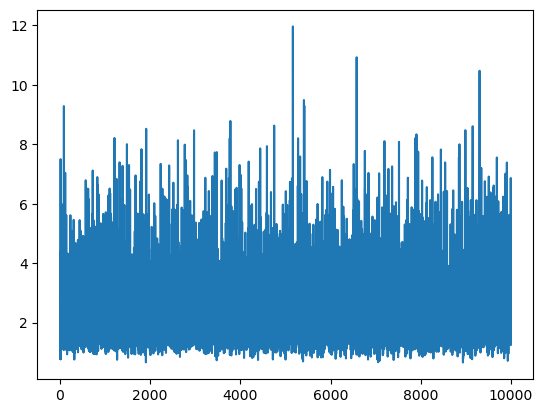

In [95]:
plt.plot(path.std(axis=0))

In [133]:
high_vol = np.where(path.std(axis=0) > 4)
len(high_vol[0]) / path.shape[1] * 100

10.03

In [149]:
low_vol = np.where(path.std(axis=0) < 1.338)
len(low_vol[0]) / path.shape[1] * 100
low_vol_path = path[:,low_vol[0]]
len(low_vol[0]) / path.shape[1] * 100

10.01

In [134]:
high_vol_path = path[:,high_vol[0]]
high_vol_path

array([[49.          , 49.          , 49.          , ..., 49.          ,
        49.          , 49.          ],
       [50.0192733134, 51.072519349 , 48.2465552559, ..., 49.2761721225,
        49.1658680182, 48.1500675851],
       [47.2294677014, 52.5219643219, 50.6530502186, ..., 48.5432378667,
        48.9400355186, 48.3139641639],
       ...,
       [59.4692703801, 70.3382276151, 59.8111440623, ..., 54.8160239904,
        66.9626188725, 63.1723364431],
       [61.7772845873, 72.2387114516, 59.0377612091, ..., 56.5821691183,
        71.0182425314, 64.9167676939],
       [61.2445338768, 72.5515734282, 58.9982716351, ..., 54.2398598405,
        67.7848226542, 62.7720152108]])

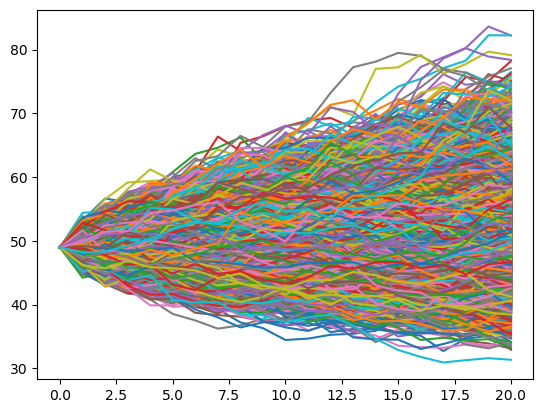

In [135]:
plt.plot(path)
plt.show()

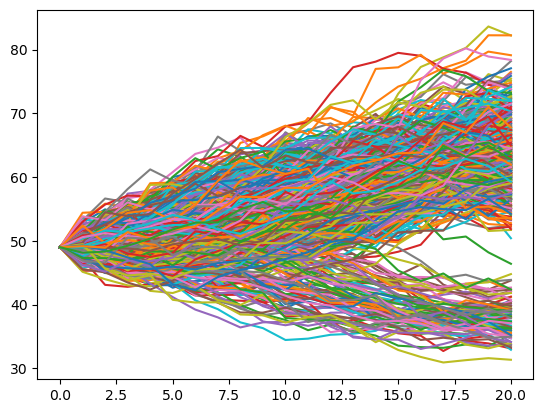

In [136]:
plt.plot(high_vol_path)
plt.show()

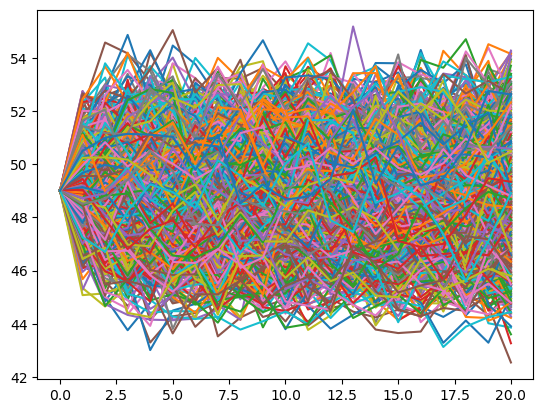

In [150]:
plt.plot(low_vol_path)
plt.show()

In [151]:
dh.hedging_cost(high_vol_path).mean(), dh.hedging_cost(path).mean(), dh.hedging_cost(low_vol_path).mean()

(2.6664575352164004, 2.4485596960020914, 2.001026194550055)